In [1]:
import sys
print(sys.version)
print(spark.version)

3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]
3.1.3


In [2]:
import os
import time
import subprocess
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
warnings.filterwarnings(action='ignore')
spark = SparkSession.builder.getOrCreate()

##Add "eagerEval.enabled" to beautify the way Spark DF is displayed
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

## To use legacy casting notation for date
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")

In [4]:
filtered=spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/sirivanth/new_filtered')

23/03/08 02:55:30 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [5]:
filtered.createOrReplaceTempView("filtered")

In [6]:
spark.sql('select created_at from filtered limit 10').toPandas()

,created_at
0,Mon Aug 08 20:46:27 +0000 2022
1,Mon Aug 08 20:46:28 +0000 2022
2,Mon Aug 08 20:46:28 +0000 2022
3,Mon Aug 08 20:46:31 +0000 2022
4,Mon Aug 08 20:46:33 +0000 2022
5,Mon Aug 08 20:46:33 +0000 2022
6,Mon Aug 08 20:46:34 +0000 2022
7,Mon Aug 08 20:46:35 +0000 2022
8,Mon Aug 08 20:46:38 +0000 2022
9,Mon Aug 08 20:46:39 +0000 2022


In [7]:
a = spark.sql('select created_at from filtered')

In [8]:
b = a.select(
    col("created_at"),
    month(to_date(col("created_at"), 'EEE MMM d HH:mm:ss z yyyy')).alias("month")
).groupby('month').count().sort('month').toPandas()

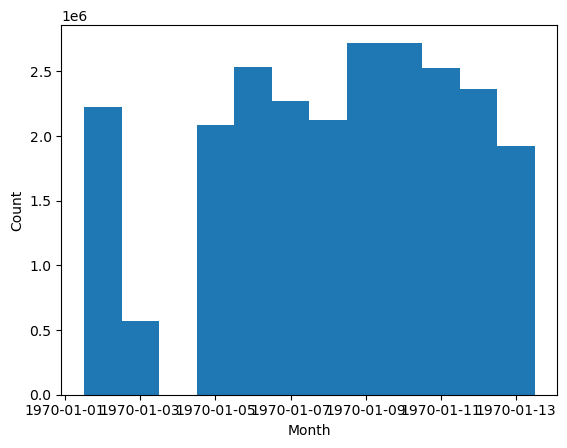

In [9]:
ax = plt.subplot()
ax.bar(b['month'],b['count'], width=1)
ax.xaxis_date()
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

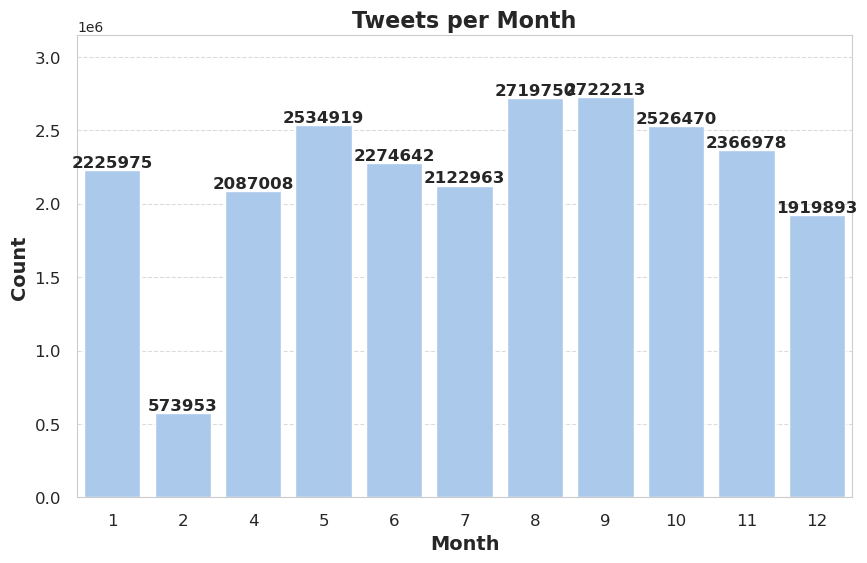

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('whitegrid')

# Define the colors
bar_colors = sns.color_palette('pastel')[0]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add the bar plot
sns.barplot(x='month', y='count', data=b, color=bar_colors)

# Add count labels inside each bar
for patch in ax.patches:
    ax.annotate("{:.0f}".format(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add x and y-axis labels
ax.set_xlabel("Month", fontsize=14, fontweight='bold')
ax.set_ylabel("Count", fontsize=14, fontweight='bold')

# Set plot title
ax.set_title("Tweets per Month", fontsize=16, fontweight='bold')

# Adjust y-axis limits
ax.set_ylim([0, ax.get_ylim()[1] * 1.1])

# Add gridlines and adjust ticks
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12, pad=8)

plt.show()


In [11]:
from pyspark.sql.functions import col, dayofweek, to_date
import pandas as pd

b = a.select(
    col("created_at"),
    dayofweek(to_date(col("created_at"), 'EEE MMM d HH:mm:ss z yyyy')).alias("weekday")
).groupby('weekday').count().sort('weekday').toPandas()


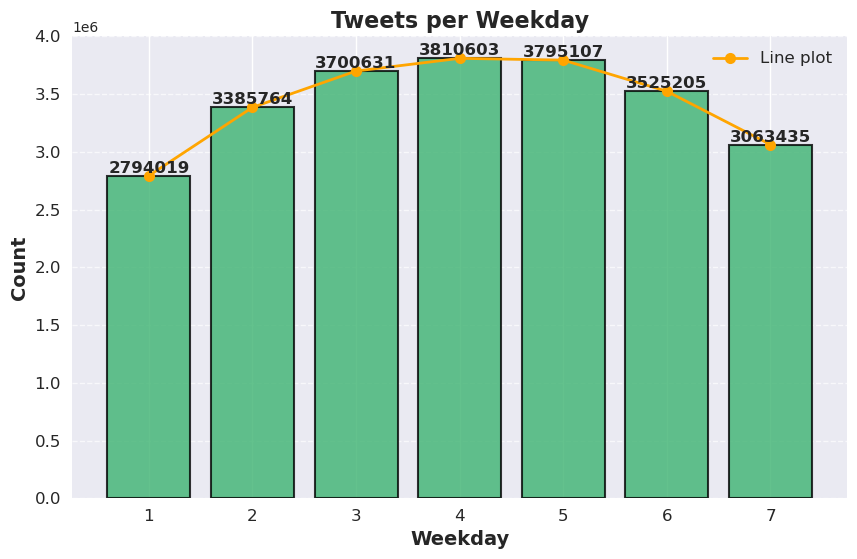

In [12]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add the bar plot
bars = ax.bar(b["weekday"], b["count"], color='mediumseagreen', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add count labels inside each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, int(height),
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a line plot
ax.plot(b["weekday"], b["count"], color='orange', linewidth=2, marker='o', markersize=8)

# Add x and y-axis labels
ax.set_xlabel("Weekday", fontsize=14, fontweight='bold')
ax.set_ylabel("Count", fontsize=14, fontweight='bold')

# Set plot title
ax.set_title("Tweets per Weekday", fontsize=16, fontweight='bold')

# Add gridlines and adjust ticks
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12, pad=8)

# Add legend
ax.legend(['Line plot'], loc='upper right', fontsize=12)

plt.show()


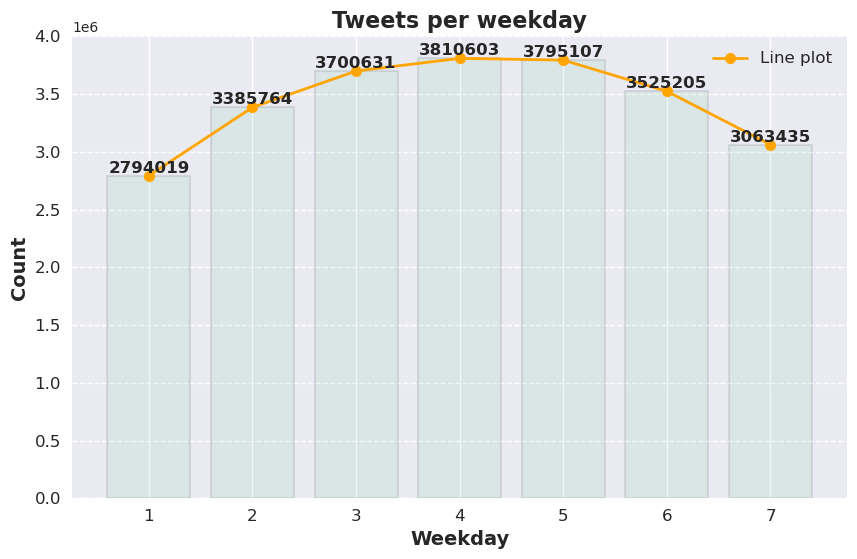

In [13]:
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add the bar plot with transparency
bars = ax.bar(b["weekday"], b["count"], color='mediumseagreen', alpha=0.09, edgecolor='black', linewidth=1.5)

# Add count labels inside each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, int(height),
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a line plot
ax.plot(b["weekday"], b["count"], color='orange', linewidth=2, marker='o', markersize=8)

# Add x and y-axis labels
ax.set_xlabel("Weekday", fontsize=14, fontweight='bold')
ax.set_ylabel("Count", fontsize=14, fontweight='bold')

# Set plot title
ax.set_title("Tweets per weekday", fontsize=16, fontweight='bold')

# Add gridlines and adjust ticks
ax.grid(axis='y', linestyle='--', alpha=0.99)
ax.tick_params(axis='both', which='major', labelsize=12, pad=8)

# Add legend
ax.legend(['Line plot'], loc='upper right', fontsize=12)

plt.show()


In [14]:
from pyspark.sql.functions import col, dayofweek, to_date, month

b = a.select(
        col("created_at"),
        dayofweek(to_date(col("created_at"), 'EEE MMM d HH:mm:ss z yyyy')).alias("weekday"),
        month(to_date(col("created_at"), 'EEE MMM d HH:mm:ss z yyyy')).alias("month")
    ).groupby('weekday', 'month').count().sort('weekday', 'month').toPandas()


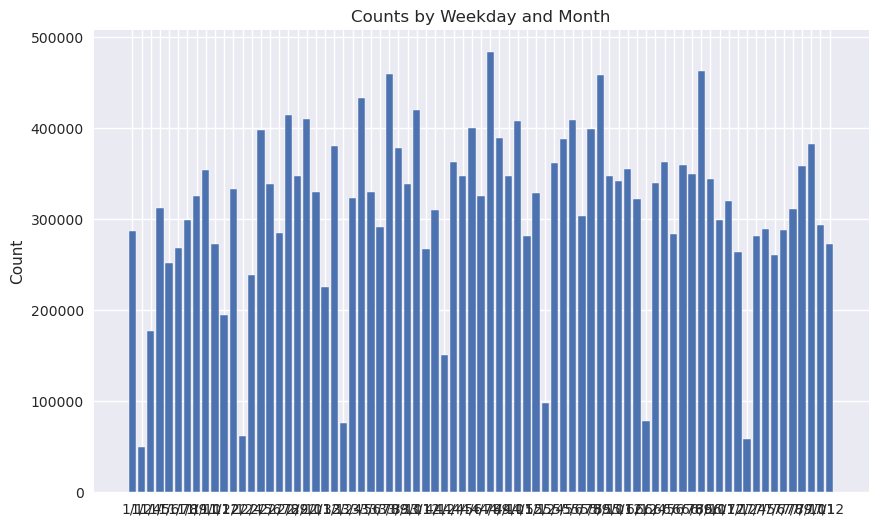

In [15]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
ax.bar(b.index, b['count'])

# Set the x-axis labels
ax.set_xticks(b.index)
ax.set_xticklabels(b.apply(lambda x: f"{x['weekday']}/{x['month']}", axis=1))

# Set the y-axis label
ax.set_ylabel('Count')

# Set the plot title
ax.set_title('Counts by Weekday and Month')

# Show the plot
plt.show()


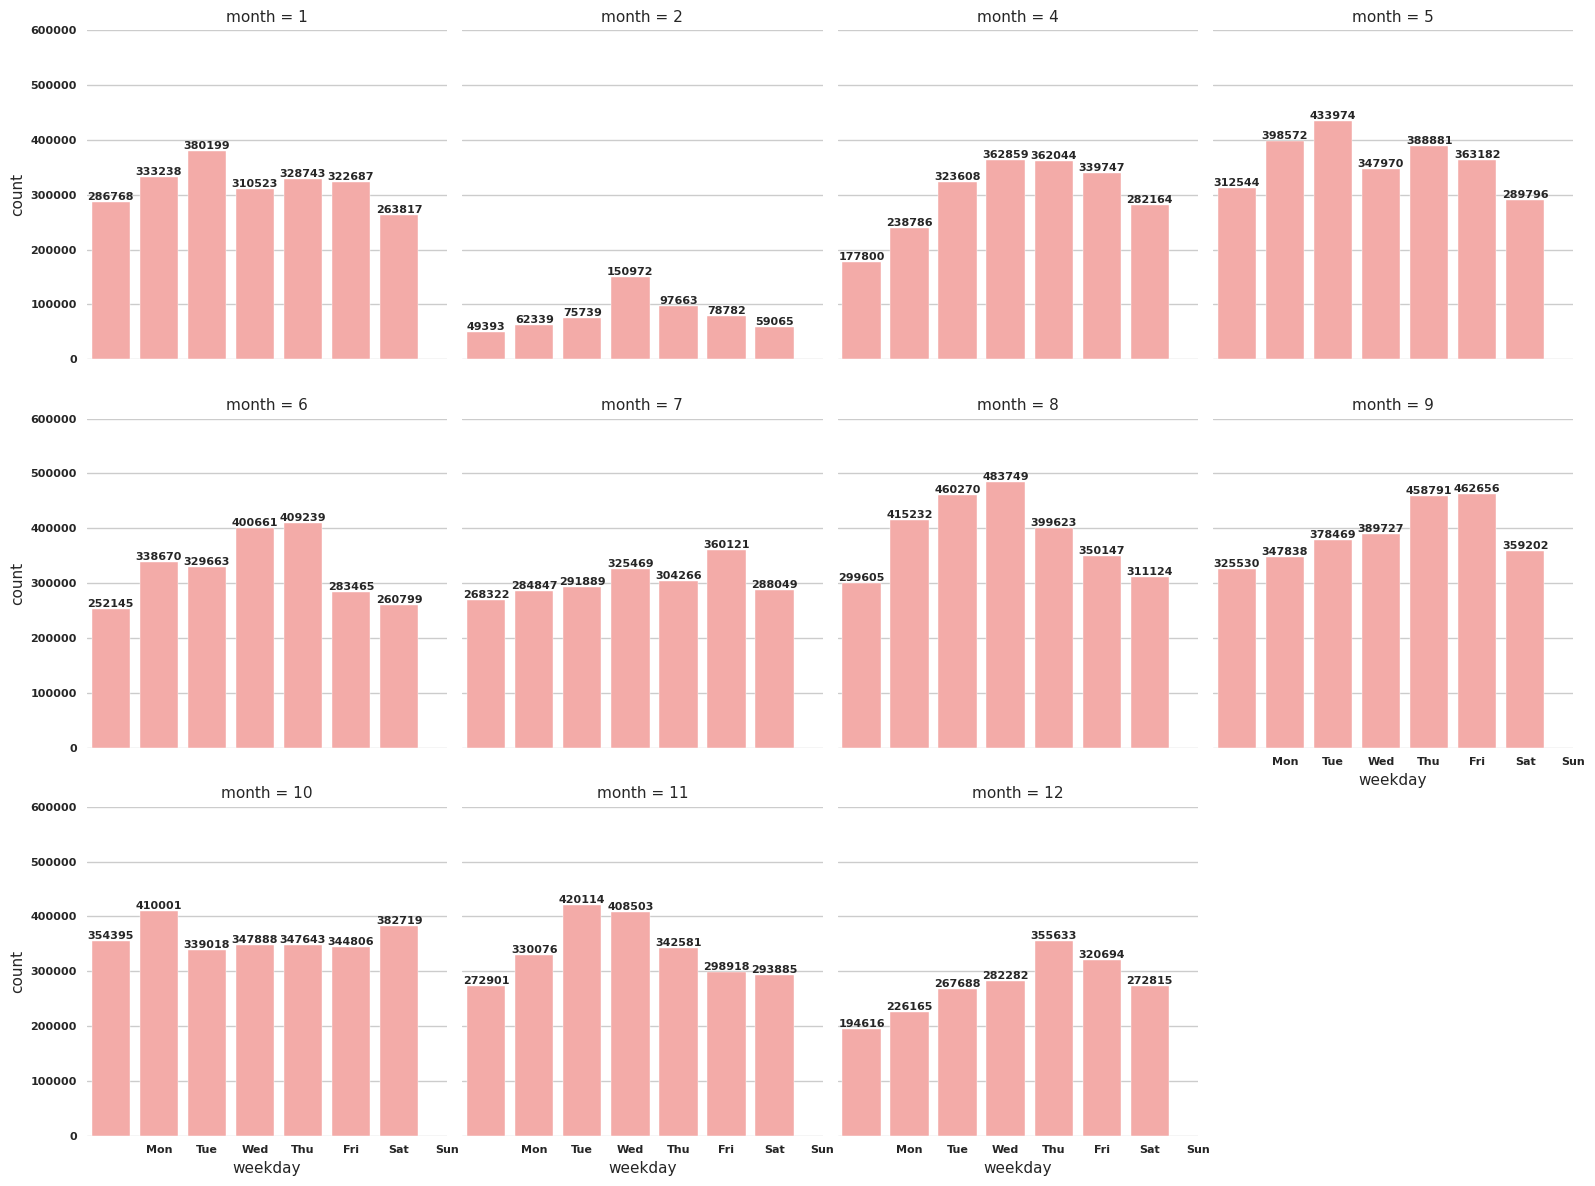

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('whitegrid')

# Define the colors
bar_colors = sns.color_palette('pastel')[3]

# Create the FacetGrid
g = sns.FacetGrid(b, col='month', col_wrap=4, height=4)

# Map the bar plot onto the grid
g.map(sns.barplot, 'weekday', 'count', color=bar_colors)

# Add count labels inside each bar
for ax in g.axes.flat:
    for patch in ax.patches:
        ax.annotate("{:.0f}".format(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    ha='center', va='bottom', fontsize=8, fontweight='bold')

# Adjust y-axis limits
g.set(ylim=(0, b['count'].max() * 1.1))

# Add gridlines and adjust ticks
g.set(xticks=b['weekday'].unique())
g.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=8, fontweight='bold')
g.set_yticklabels(g.axes.flat[0].get_yticks().astype(int), fontsize=8, fontweight='bold')

plt.show()


In [17]:
from pyspark.sql.functions import col, dayofweek, to_date, month, dayofmonth

b = a.select(
        col("created_at"),
        dayofweek(to_date(col("created_at"), 'EEE MMM d HH:mm:ss z yyyy')).alias("weekday"),
        month(to_date(col("created_at"), 'EEE MMM d HH:mm:ss z yyyy')).alias("month"),
        dayofmonth(to_date(col("created_at"), 'EEE MMM d HH:mm:ss z yyyy')).alias("day")
    ).groupby('day', 'weekday', 'month').count().sort('day', 'weekday', 'month').toPandas()

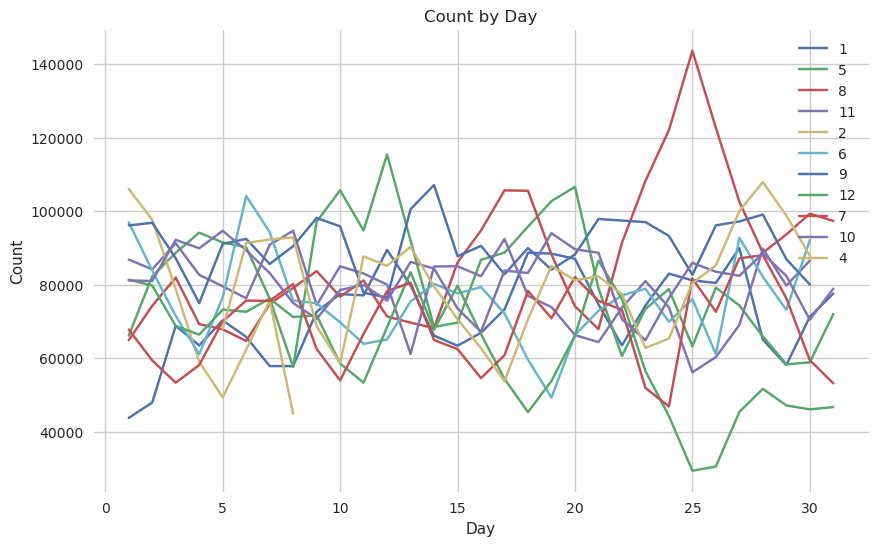

In [18]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10, 6))

# Group the data by month and plot a line graph of the count column against the day column
for month in b['month'].unique():
    month_data = b[b['month'] == month]
    plt.plot(month_data['day'], month_data['count'], label=month)

# Add axis labels and a title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count by Day')

# Add a legend
plt.legend()

# Show the plot
plt.show()


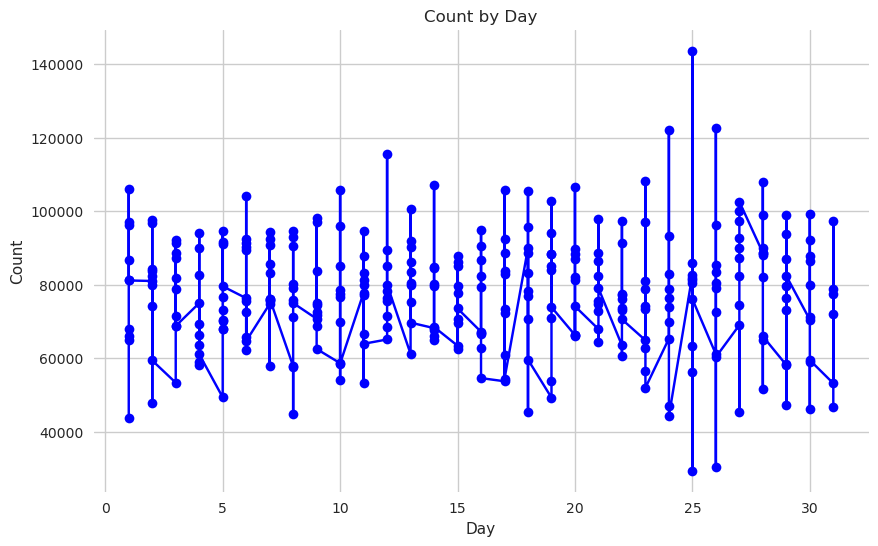

In [19]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10, 6))

# Plot a line graph of count against day
plt.plot(b['day'], b['count'], marker='o', linestyle='-', color='blue')

# Add axis labels and a title
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count by Day')

# Show the plot
plt.show()



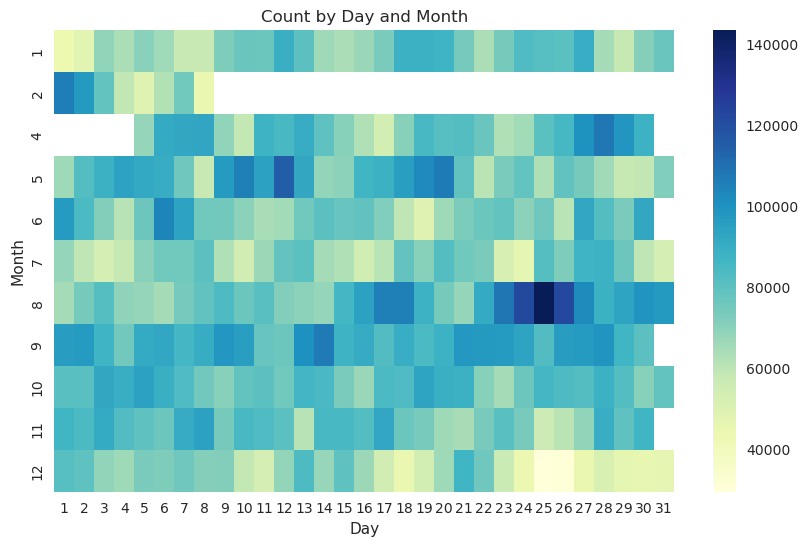

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(10, 6))

# Pivot the data to create a heatmap
pivoted = b.pivot('month', 'day', 'count')

# Plot a heatmap of count by day and month
sns.heatmap(pivoted, cmap='YlGnBu')

# Add axis labels and a title
plt.xlabel('Day')
plt.ylabel('Month')
plt.title('Count by Day and Month')

# Show the plot
plt.show()
